Nuestro objetivo es hacer un Análisis Exploratorio de Datos de los conjuntos de datos limpios: informacion de las empresas de google maps (Business_Maps), informacion de las empresas de yelps (Business_Yelp), los id de las empresas (dataframe_business_id) y las reseñas de usuarios (reviews_union). Mediante el uso de estadísticas descriptivas y visualizaciones, buscaremos comprender mejor las distribuciones, preferencias y tendencias a lo largo del tiempo. Además, pretendemos identificar las variables más relevantes y significativas dentro de estos conjuntos de datos para obtener una comprensión más profunda y completa de la relación entre las reseñas y las empresas.

### Importaccion las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

Extraccion de los datos a partir de archivos CSV

In [5]:
df_business_maps = pd.read_csv("DATASET/Business_Maps.csv")

In [6]:
df_business_yelp = pd.read_csv("DATASET/Business_Yelp.csv")

In [7]:
df_business_id = pd.read_csv("DATASET/dataframe_business_id.csv")

In [8]:
df_review = pd.read_csv("DATASET/reviews_union.csv")

C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_11784\2766590599.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review = pd.read_csv("DATASET/reviews_union.csv")


## EDA - DATASET BUSINESS MAPS

In [9]:
df_business_maps.head(5)

,gmap_id,name,category_id,business_category,latitude,longitude,adress,avg_ratingM,num_of_reviewsM,hours,attributesM,business_id
0,0x88d9ab97fb55bebf:0x57152adb298e368,WINGS N CURLS,LTEyM,Restaurant,26.011536,-80.154709,NaN,3.3,38,"Tuesday, 11AM–9PM, Wednesday, 11AM–9PM, Thursd...",Delivery,-80.154709-26.011536
1,0x88dd39535ef89967:0x947513676a6a23be,Taco San Marcos,LTEyM,Restaurant,27.981669,-81.957434,NaN,4.8,55,"Tuesday, 11AM–6PM, Wednesday, 11AM–6PM, Thursd...","Outdoor seating, Takeout, Dine-in, Delivery",-81.957434-27.981669
2,0x88e8bb764b40114f:0xaec41d838f6bc69a,Domino's Pizza,Nzk4O,Sandwich Shop,29.680396,-82.433186,NaN,3.8,15,"Tuesday, 8:30AM–5PM, Wednesday, 8:30AM–5PM, Th...","Curbside pickup, No-contact delivery, Delivery...",-82.433186-29.680396
3,0x88d9ad48bdd6fb47:0x6206bf46016f1806,Bodega Taqueria y Tequila Aventura,LTEyM,Restaurant,25.952553,-80.146011,NaN,3.7,28,"Tuesday, 11AM–10PM, Wednesday, 11AM–10PM, Thur...","Wheelchair accessible entrance,Curbside pickup...",-80.146011-25.952553
4,0x889381fc9fb6b7a9:0x1462d721c1f99d63,In & Out Seafood & Wings,LTEyM,Restaurant,30.149222,-85.624050,NaN,4.5,78,"Tuesday, 11AM–8PM, Wednesday, 11AM–8PM, Thursd...","Takeout, Delivery",-85.62405-30.149222


In [10]:
df_business_maps.shape

(5193, 12)

In [11]:
df_business_maps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193 entries, 0 to 5192
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gmap_id            5193 non-null   object 
 1   name               5193 non-null   object 
 2   category_id        4741 non-null   object 
 3   business_category  5193 non-null   object 
 4   latitude           5193 non-null   float64
 5   longitude          5193 non-null   float64
 6   adress             0 non-null      float64
 7   avg_ratingM        5193 non-null   float64
 8   num_of_reviewsM    5193 non-null   int64  
 9   hours              5193 non-null   object 
 10  attributesM        5156 non-null   object 
 11  business_id        5193 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 487.0+ KB


In [12]:
# Se crea un subconjunto del DataFrame que contiene solo las columnas necesarias
df_subset_df_business_maps = df_business_maps[["avg_ratingM", "num_of_reviewsM"]]

# Se obtiene estadísticas descriptivas sobre el subconjunto de datos
# Esto proporciona información sobre la distribución y la dispersión de los datos en las columnas seleccionadas
df_subset_df_business_maps.describe()


,avg_ratingM,num_of_reviewsM
count,5193.000000,5193.000000
mean,4.202253,303.047371
std,0.490044,639.133398
min,1.500000,11.000000
25%,3.900000,35.000000
50%,4.300000,58.000000
75%,4.600000,163.000000
max,5.000000,8116.000000


### Distribución de los Datos
### Analisis variable business_category

Se realizara un grafico de barras para ver la cantidad de cada categoria

In [13]:
category_counts = df_business_maps['business_category'].value_counts()
category_counts

business_category
Restaurant          4152
Other                452
Sandwich Shop        344
Coffee Shop          155
Juice Shop            42
Ice Cream Shop        30
Bakery                13
Specialty Dining       3
Fast Food              2
Name: count, dtype: int64

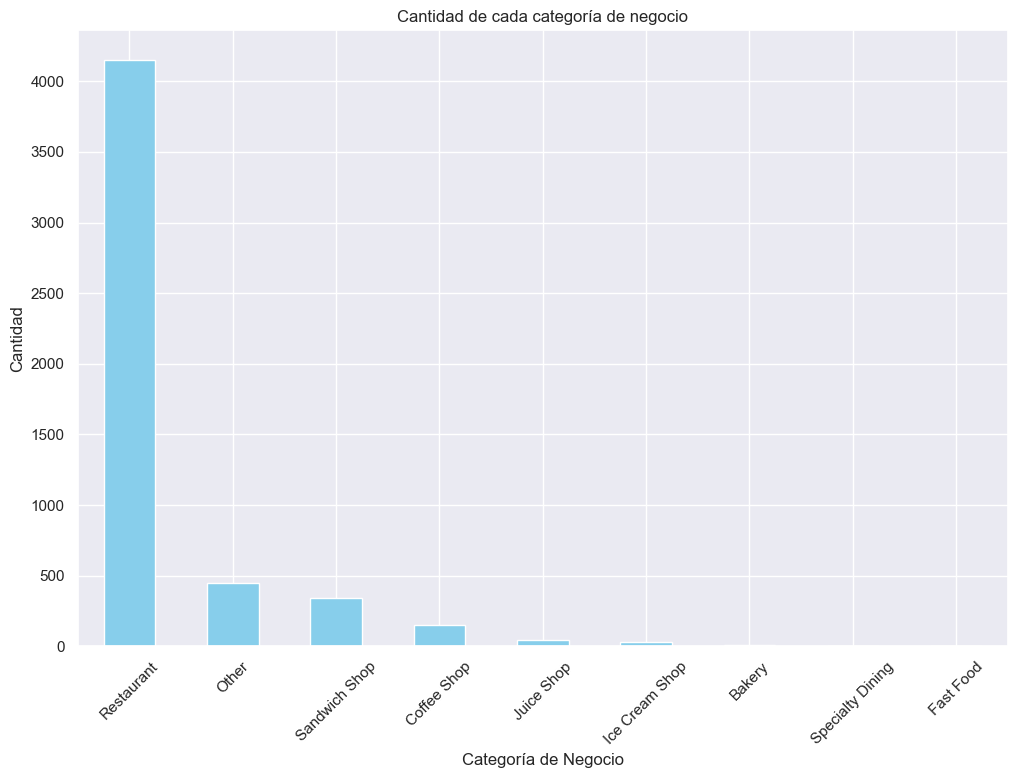

In [14]:
# Crear el gráfico de barras usando Matplotlib
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de cada categoría de negocio')
plt.xlabel('Categoría de Negocio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### Analisis variable avg_ratingM

Muestra la frecuencia de los ratings dentro de intervalos específicos. Es útil para ver cómo se distribuyen los ratings a lo largo de la escala de 1 a 5

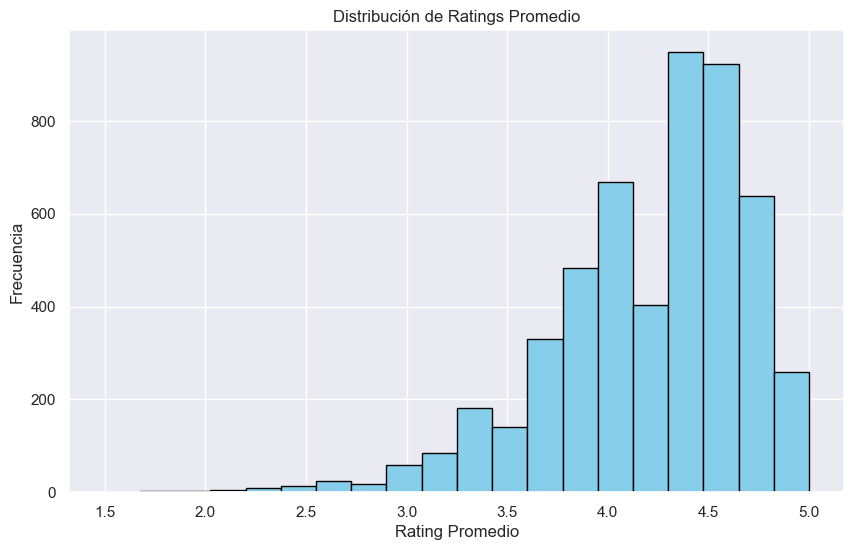

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_business_maps['avg_ratingM'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings Promedio')
plt.xlabel('Rating Promedio')
plt.ylabel('Frecuencia')
plt.show()

### Analisis de la variable num_of_reviewsM

El boxplot permitirá observar la distribución de los datos en num_of_reviewsM, identificar la mediana (la línea dentro de la caja), los cuartiles (los bordes de la caja) y los posibles outliers (puntos fuera de los "bigotes" del gráfico). Esto es útil para entender la dispersión y detectar cualquier anomalía en los datos.

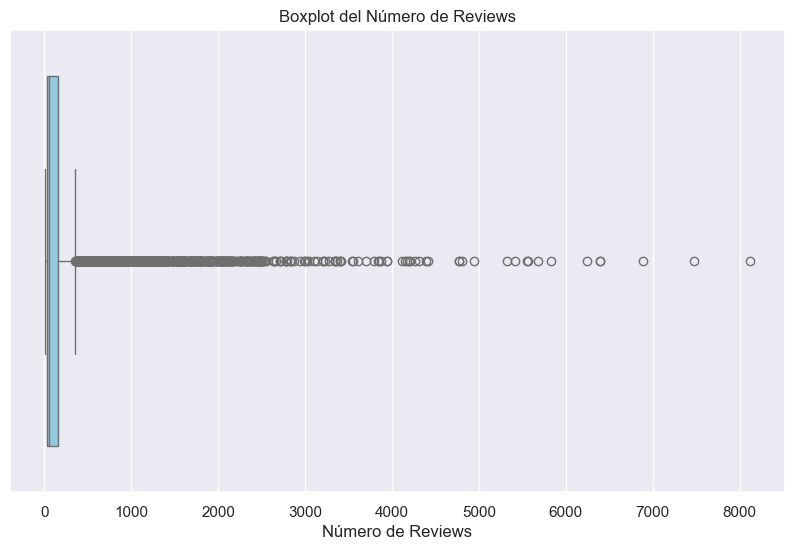

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_business_maps['num_of_reviewsM'], color='skyblue')
plt.title('Boxplot del Número de Reviews')
plt.xlabel('Número de Reviews')
plt.show()

### Analisis de correlaciones


El análisis de correlación entre una variable avg_ratingM y la variable business_category

Boxplots por Categoría
Los boxplots te permitirán ver la distribución de avg_ratingM dentro de cada categoría de business_category.

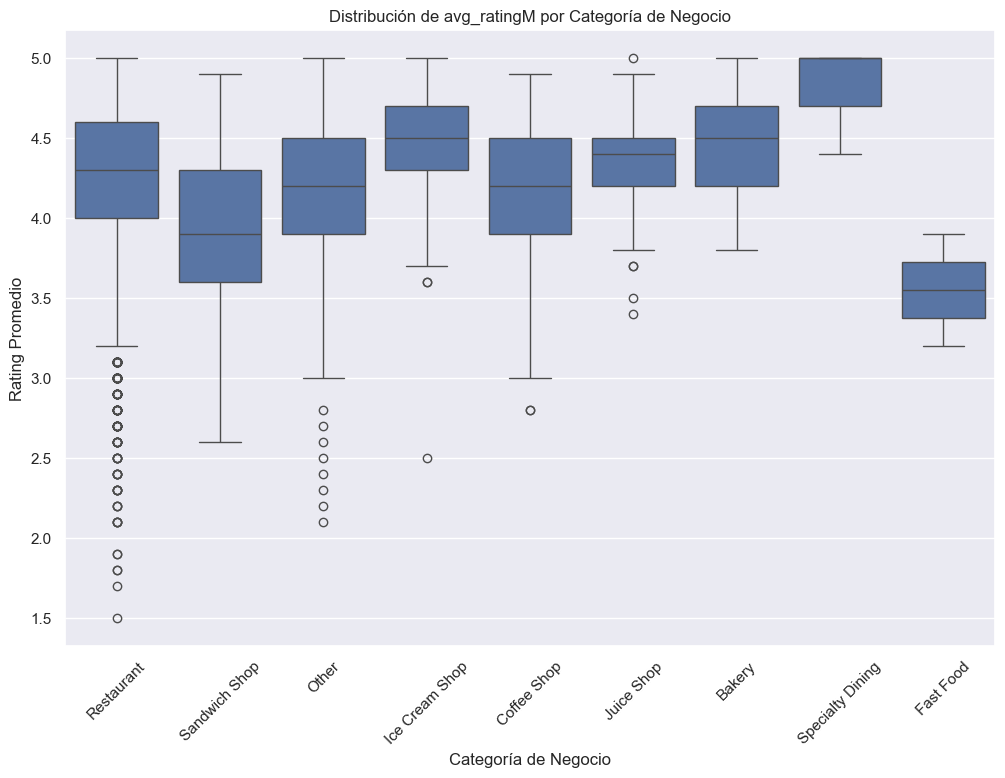

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='business_category', y='avg_ratingM', data=df_business_maps)
plt.title('Distribución de avg_ratingM por Categoría de Negocio')
plt.xlabel('Categoría de Negocio')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45)
plt.show()

Análisis de varianza (ANOVA): Para determinar si hay diferencias significativas en los promedios de avg_ratingM entre las categorías de business_category.

In [18]:
# Crear una lista de ratings por categoría
groups = [group['avg_ratingM'].values for name, group in df_business_maps.groupby('business_category')]

# Realizar ANOVA
anova_result = stats.f_oneway(*groups)
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

F-statistic: 18.549984665992312, p-value: 1.1039668979020582e-27


Prueba de Kruskal-Wallis: Una alternativa no paramétrica a ANOVA si los supuestos de normalidad no se cumplen.

In [19]:
kruskal_result = stats.kruskal(*groups)
print(f"H-statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")

H-statistic: 171.19292192420372, p-value: 7.251929250510127e-33


Cálculo de medias y desviaciones estándar: Para cada categoría de business_category.

In [20]:
category_stats = df_business_maps.groupby('business_category')['avg_ratingM'].agg(['mean', 'std', 'count']).reset_index()
print(category_stats)

  business_category      mean       std  count
0            Bakery  4.492308  0.356982     13
1       Coffee Shop  4.134194  0.455335    155
2         Fast Food  3.550000  0.494975      2
3    Ice Cream Shop  4.376667  0.528292     30
4        Juice Shop  4.316667  0.358803     42
5             Other  4.175000  0.478791    452
6        Restaurant  4.227336  0.487623   4152
7     Sandwich Shop  3.924419  0.465782    344
8  Specialty Dining  4.800000  0.346410      3


Correlacion entre avg_rating y numero de reviews

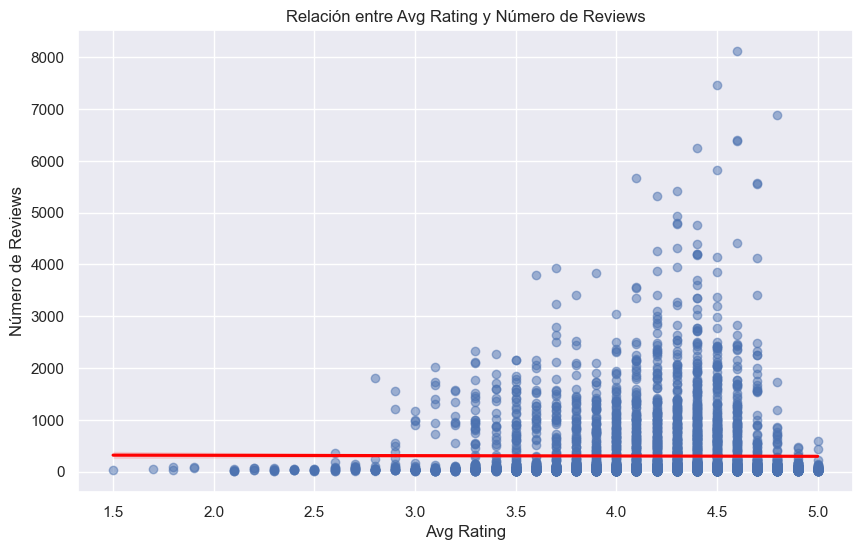

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_ratingM', y='num_of_reviewsM', data=df_business_maps, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relación entre Avg Rating y Número de Reviews')
plt.xlabel('Avg Rating')
plt.ylabel('Número de Reviews')
plt.show()

Línea de Regresión: La línea roja ajustada a los datos es la línea de regresión. Esta línea representa la mejor aproximación lineal de la relación entre avg_ratingM y num_of_reviewsM. Si la relación entre las dos variables es lineal, los puntos se agruparán cerca de esta línea.

## EDA - DATASET BUSINESS YELP

In [22]:
df_business_yelp.head(5)

,yelp_id,name,category_id,business_category,latitude,longitude,adress,stars,num_of_reviewsY,hours,attributesY,business_id
0,k5LRHoQHGyaLjC9i6RkGcQ,Subway,Nzk4O,Sandwich Shop,27.896959,-82.247303,NaN,3.5,8,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-22:0', '...","{'RestaurantsPriceRange2': '1', 'GoodForKids':...",-82.247303-27.896959
1,H6tPRvGHvm-TdQ40LZE0aw,Dragon Express,ODU1N,Chinese Cuisine,28.068850,-82.435273,NaN,4.0,22,"{'Monday': '11:0-22:30', 'Wednesday': '11:0-22...","{'RestaurantsTakeOut': 'True', 'BusinessAccept...",-82.435273-28.06885
2,h7pY4--PXa5GvZaskzAy-g,Rodie's Restaurant and Pancake House,OTE3M,American Cuisine,28.138015,-82.756277,NaN,4.0,102,"{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ...","{'RestaurantsPriceRange2': '1', 'RestaurantsTa...",-82.756277-28.138015
3,CX7eMbe7_EQEh_dk4eBxYg,The Blue Dolphin Restaurant,LTg5M,Seafood Restaurant,28.331650,-82.669045,NaN,3.0,9,"{'Tuesday': '11:30-21:0', 'Wednesday': '11:30-...","{'NoiseLevel': ""u'quiet'"", 'HasTV': 'False', '...",-82.669045-28.33165
4,8fIIeyRpL-osIWF8oDGOeA,Panda Express,ODU1N,Chinese Cuisine,27.835905,-82.682159,NaN,3.0,56,"{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:...","{'RestaurantsGoodForGroups': 'True', 'Restaura...",-82.682159-27.835905


In [23]:
df_business_yelp.shape

(8829, 12)

In [24]:
df_business_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yelp_id            8829 non-null   object 
 1   name               8829 non-null   object 
 2   category_id        8829 non-null   object 
 3   business_category  8829 non-null   object 
 4   latitude           8829 non-null   float64
 5   longitude          8829 non-null   float64
 6   adress             0 non-null      float64
 7   stars              8829 non-null   float64
 8   num_of_reviewsY    8829 non-null   int64  
 9   hours              7845 non-null   object 
 10  attributesY        8718 non-null   object 
 11  business_id        8829 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 827.8+ KB


In [25]:
# Se crea un subconjunto del DataFrame que contiene solo las columnas necesarias
df_subset_df_business_yelp = df_business_yelp[["stars", "num_of_reviewsY"]]

# Se obtiene estadísticas descriptivas sobre el subconjunto de datos
# Esto proporciona información sobre la distribución y la dispersión de los datos en las columnas seleccionadas
df_subset_df_business_yelp.describe()

,stars,num_of_reviewsY
count,8829.000000,8829.000000
mean,3.579907,86.210896
std,0.833899,155.308781
min,1.000000,5.000000
25%,3.000000,15.000000
50%,3.500000,35.000000
75%,4.000000,94.000000
max,5.000000,3260.000000


### Distribución de los Datos
### Analisis variable business_category

Se realizara un grafico de barras para ver la cantidad de cada categoria

In [26]:
category_counts_yelp = df_business_yelp['business_category'].value_counts()
category_counts_yelp

business_category
American Cuisine          1406
Restaurant                1067
Sandwich Shop              818
Seafood Restaurant         643
Asian Cuisine              614
Chicken Restaurant         601
Ice Cream Shop             495
Coffee Shop                490
Mexican Cuisine            487
Italian Cuisine            472
Fast Food                  333
Specialty Dining           329
Chinese Cuisine            262
Latin American Cuisine     254
Juice Shop                 195
Vegetarian Restaurant      169
Vietnamese Restaurant      112
Indian Cuisine              82
Name: count, dtype: int64

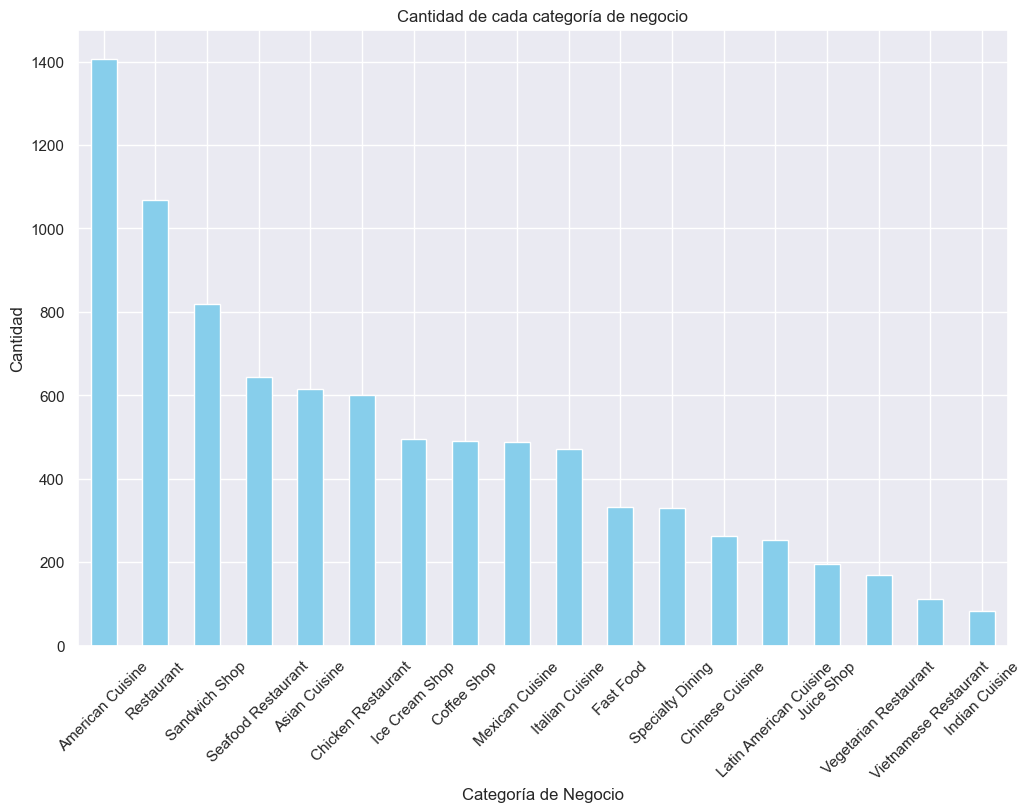

In [27]:
# Crear el gráfico de barras usando Matplotlib
plt.figure(figsize=(12, 8))
category_counts_yelp.plot(kind='bar', color='skyblue')
plt.title('Cantidad de cada categoría de negocio')
plt.xlabel('Categoría de Negocio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### Analisis variable stars

Muestra la frecuencia de stars dentro de intervalos específicos. Es útil para ver cómo se distribuyen los ratings a lo largo de la escala de 1 a 5

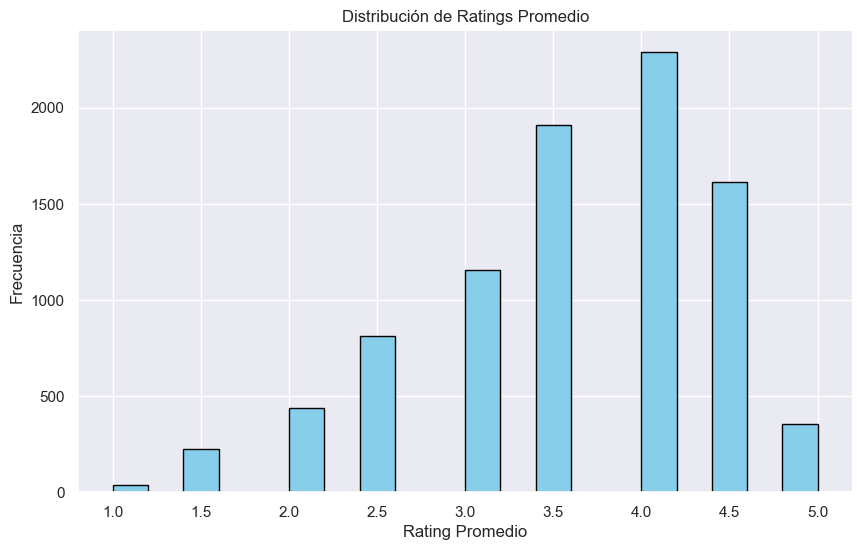

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df_business_yelp['stars'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings Promedio')
plt.xlabel('Rating Promedio')
plt.ylabel('Frecuencia')
plt.show()

### Analisis de la variable num_of_reviewsY

El boxplot permitirá observar la distribución de los datos en num_of_reviewsY, identificar la mediana (la línea dentro de la caja), los cuartiles (los bordes de la caja) y los posibles outliers (puntos fuera de los "bigotes" del gráfico). Esto es útil para entender la dispersión y detectar cualquier anomalía en los datos.

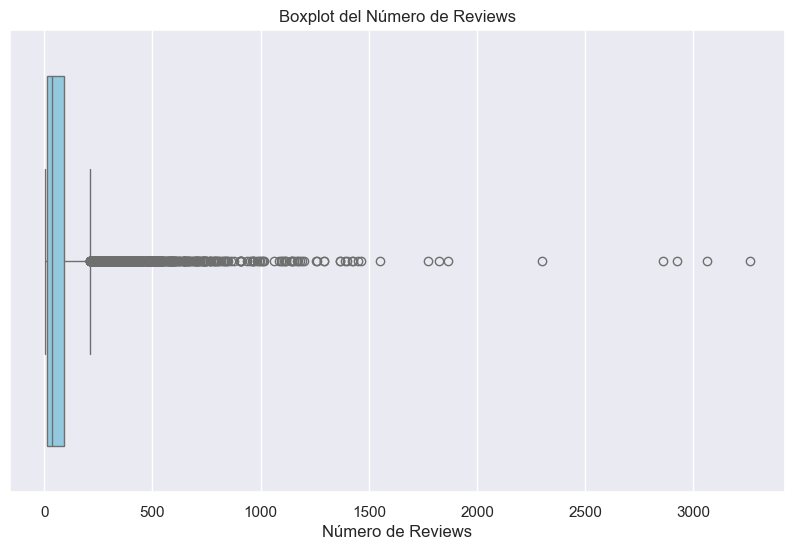

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_business_yelp['num_of_reviewsY'], color='skyblue')
plt.title('Boxplot del Número de Reviews')
plt.xlabel('Número de Reviews')
plt.show()

### Analisis de correlaciones

El análisis de correlación entre una variable stars y la variable business_category

Boxplots por Categoría
Los boxplots te permitirán ver la distribución de avg_ratingY dentro de cada categoría de business_category.

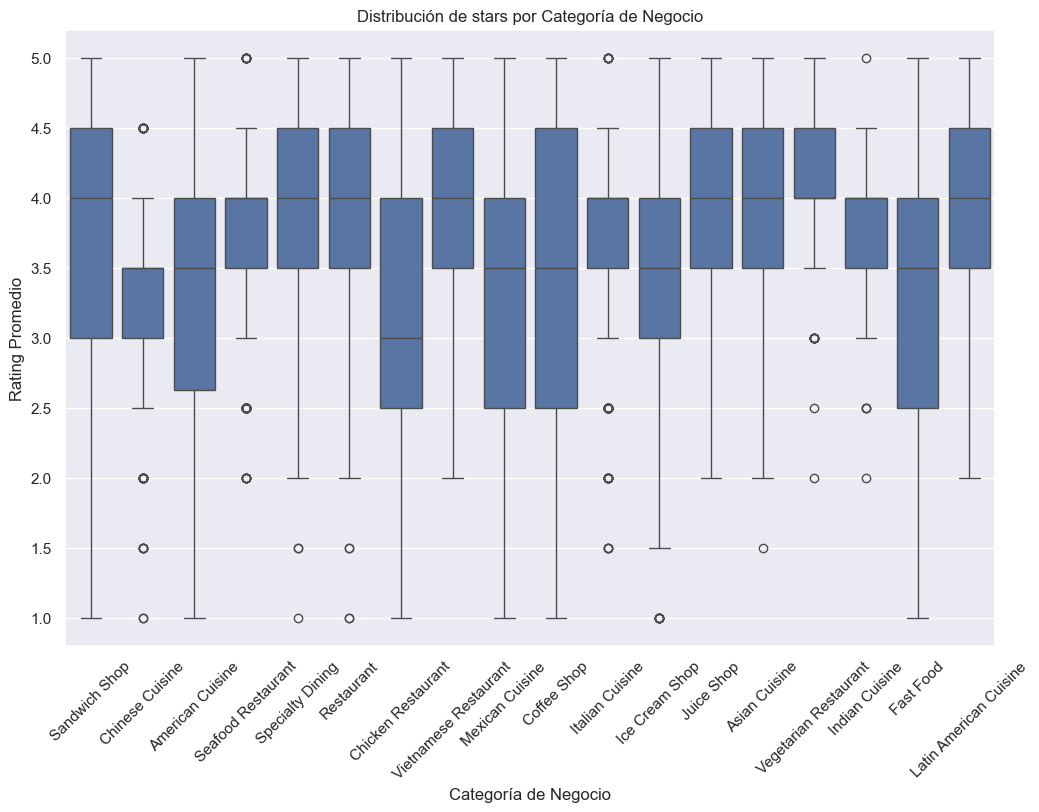

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='business_category', y='stars', data=df_business_yelp)
plt.title('Distribución de stars por Categoría de Negocio')
plt.xlabel('Categoría de Negocio')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45)
plt.show()

Correlacion entre stars y numero de reviews

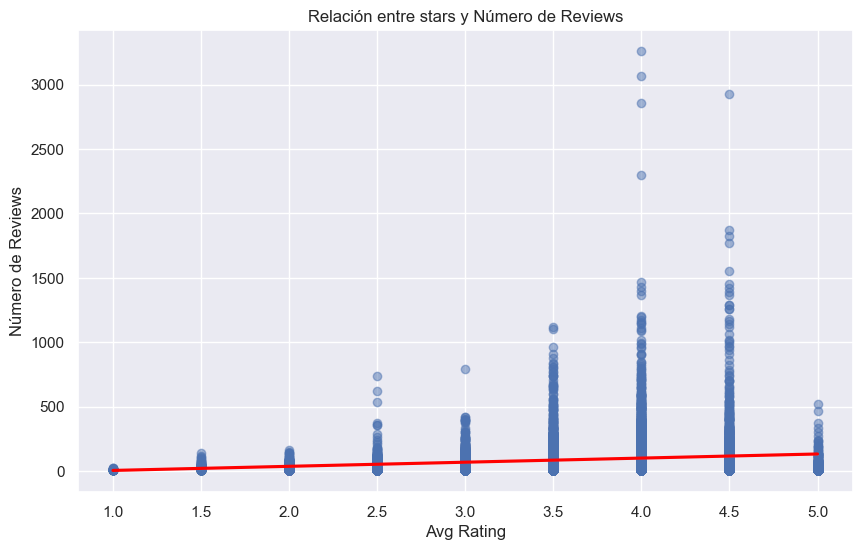

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='stars', y='num_of_reviewsY', data=df_business_yelp, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relación entre stars y Número de Reviews')
plt.xlabel('Avg Rating')
plt.ylabel('Número de Reviews')
plt.show()

## EDA - DATASET BUSINESS ID

In [32]:
df_business_id.head(5)

,business_id,latitude,longitude,name
0,-80.154709-26.011536,26.011536,-80.154709,WINGS N CURLS
1,-81.957434-27.981669,27.981669,-81.957434,Taco San Marcos
2,-82.433186-29.680396,29.680396,-82.433186,Domino's Pizza
3,-80.146011-25.952553,25.952553,-80.146011,Bodega Taqueria y Tequila Aventura
4,-85.62405-30.149222,30.149222,-85.624050,In & Out Seafood & Wings


In [33]:
df_business_id.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13964 entries, 0 to 13963
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  13964 non-null  object 
 1   latitude     13964 non-null  float64
 2   longitude    13964 non-null  float64
 3   name         13964 non-null  object 
dtypes: float64(2), object(2)
memory usage: 436.5+ KB


In [34]:
unique_business_ids = df_business_maps['business_id'].nunique()
unique_business_ids

5154

Es la cantidad de business_ID, 5154, cantidad de negocios unicos

## EDA - DATASET REVIEW

In [35]:
df_review.head(5)

,review_id,user_id,platform_id,platform,business_id,text,date,rating
0,572,109618771615485546482,0x88d9ab97fb55bebf:0x57152adb298e368,M,-80.154709-26.011536,"Best service I've had in a while, the waiter w...",2016-09-21 05:50:51,5
1,573,102292736999525394556,0x88d9ab97fb55bebf:0x57152adb298e368,M,-80.154709-26.011536,"I loved the people, when I worked there and al...",2017-06-25 01:32:55,5
2,574,115255773073332262064,0x88d9ab97fb55bebf:0x57152adb298e368,M,-80.154709-26.011536,Best wings ever! Still can't find a place that...,2015-12-19 18:39:21,5
3,575,111199664269920344334,0x88d9ab97fb55bebf:0x57152adb298e368,M,-80.154709-26.011536,I used to go to this place all the time about ...,2016-10-27 20:26:50,1
4,576,118439159496578951359,0x88d9ab97fb55bebf:0x57152adb298e368,M,-80.154709-26.011536,"Always good food, today I decided to eat somet...",2015-10-22 23:19:13,5


In [36]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684929 entries, 0 to 1684928
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   review_id    1684929 non-null  object
 1   user_id      1684929 non-null  object
 2   platform_id  1684929 non-null  object
 3   platform     1684929 non-null  object
 4   business_id  1684929 non-null  object
 5   text         1684929 non-null  object
 6   date         1684929 non-null  object
 7   rating       1684929 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 102.8+ MB


Analisis de variable user_id

In [39]:
top_user = df_review["user_id"].value_counts().head(10)
top_user

user_id
fr1Hz2acAb3OaL3l6DyKNg    1086
pou3BbKsIozfH50rxmnMew     870
VL12EhEdT4OWqGq0nIqkzw     869
qjfMBIZpQT9DDtw_BWCopQ     789
Um5bfs5DH6eizgjH3xZsvg     718
vffKQc_WQMYFGY4JS5VAOw     693
-kLVfaJytOJY2-QdQoCcNQ     684
AaJ9d4OrFmgc4S_U2QiSZg     617
sh3V6hnNMLVV9YwFA9QNaw     605
I2XpWCHAom1JRyHXZQrnfg     528
Name: count, dtype: int64

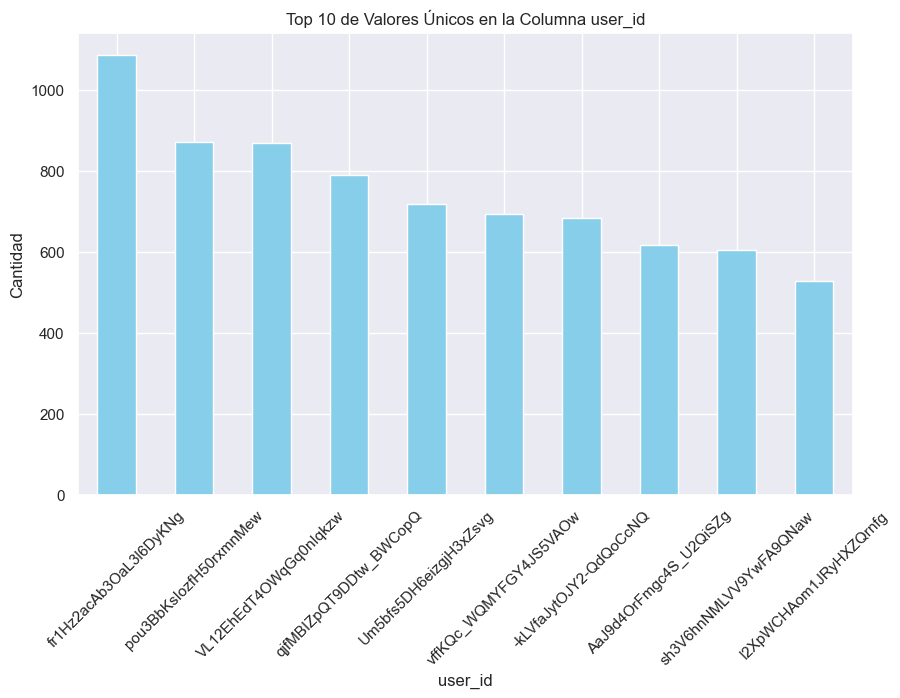

In [44]:
plt.figure(figsize=(10, 6))
top_user.plot(kind='bar', color='skyblue')
plt.title('Top 10 de Valores Únicos en la Columna user_id')
plt.xlabel('user_id')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

Analisis de variable business_id

In [42]:
# Se obtiene el recuento de reseñas y se toman los 10 principales
top_business = df_review["business_id"].value_counts().head(10)
top_business

business_id
-81.311305-29.893406    3958
-81.431334-28.486003    3787
-82.493254-27.921942    3388
-82.500338-27.322649    3193
-82.46253-27.960161     3179
-81.655261-28.243601    3035
-82.4827-27.931862      3028
-82.764087-27.753665    3013
-82.434904-27.960006    2916
-80.247445-26.01252     2694
Name: count, dtype: int64

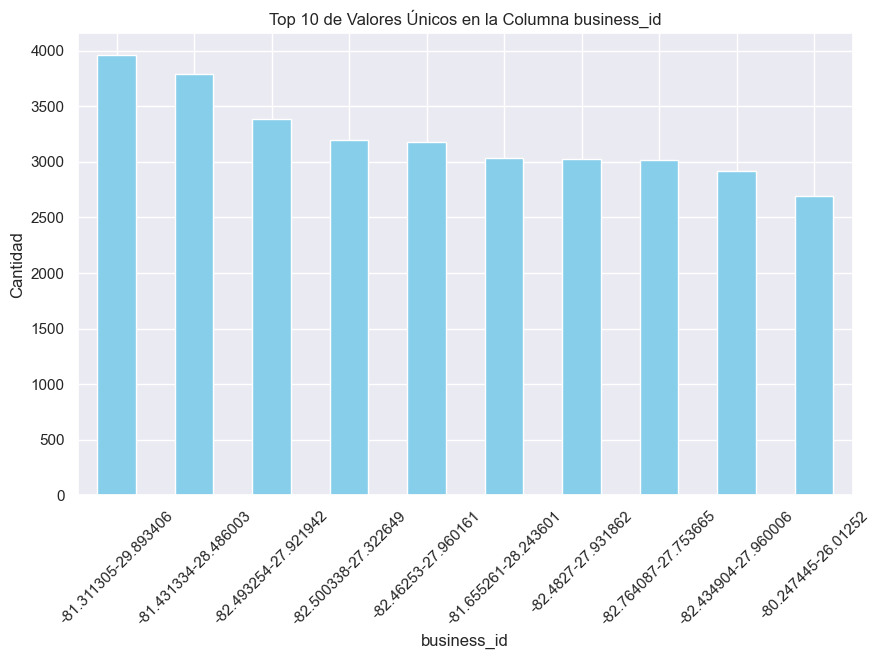

In [43]:
plt.figure(figsize=(10, 6))
top_business.plot(kind='bar', color='skyblue')
plt.title('Top 10 de Valores Únicos en la Columna business_id')
plt.xlabel('business_id')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()